# Imports and auxiliary functions for plotting

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import io
import re

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns; sns.set(); sns.set(font_scale=1.0); sns.set_style("white"); 

import matplotlib as mpl
from matplotlib import pyplot as plt
#%matplotlib inline

def _reset_mpl_config(font_size = 17*1.5, cmbright=True):
    mpl.rcParams.update(mpl.rcParamsDefault) #reset to defaults
        
    SMALL_SIZE = font_size-4
    MEDIUM_SIZE = font_size
    BIGGER_SIZE = font_size
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    plt.rc('font',**{'family':'serif','serif':['Times'], "weight": "normal"})
    plt.rc('text', usetex=True)
    plt.rc('mathtext', fontset='stix')  #['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']
    
    mpl.rcParams['text.latex.preamble'] = [
            r'\usepackage{mathtools}',
            r'\usepackage{amsmath}',
            r'\usepackage{amsfonts}', 
            r'\usepackage{microtype}',    
            r'\usepackage{arydshln}',              
    ] + ([r'\usepackage{cmbright}'] if cmbright else [])

def _create_fig(bottom=0.2, left=0.125, right=0.9, top=0.9):
    fig = plt.figure(figsize=(6.4, 4.8), dpi=72)
    fig.subplots_adjust(bottom=bottom, left=left, right=right, top=top) 
    
    
def start_plotting(cmbright=True, font_size=17*1.5, bottom=0.2, left=0.125, right=0.95, top=0.95):
    _reset_mpl_config(cmbright=cmbright, font_size=font_size)
    _create_fig(bottom=bottom, left=left, right=right, top=top)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def fix_colors(bp, color):
    # boxplot style adjustments
    [item.set_linewidth(2) for item in bp['boxes']]
    [item.set_linewidth(2) for item in bp['fliers']]
    [item.set_linewidth(2) for item in bp['medians']]
    [item.set_linewidth(2) for item in bp['means']]
    [item.set_linewidth(0.5) for item in bp['whiskers']]
    [item.set_linewidth(0.5) for item in bp['caps']]

    [item.set_color(color) for item in bp['boxes']]
    [item.set_color("k") for item in bp['fliers']]
    [item.set_color(color) for item in bp['medians']]
    [item.set_color("k") for item in bp['means']]
    [item.set_color("k") for item in bp['whiskers']]
    [item.set_color("k") for item in bp['caps']]

In [5]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

def my_formatter3(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    val_str = "%.3f" % x
    if np.abs(x) > 0 and np.abs(x) < 1:
        return val_str.replace("0.", ".", 1)
    else:
        return val_str
    
    
def my_formatter2(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    val_str = "%.2f" % x
    if np.abs(x) > 0 and np.abs(x) < 1:
        return val_str.replace("0.", ".", 1)
    else:
        return val_str    
    
# Set up the formatter.
major_formatter3 = FuncFormatter(my_formatter3)    
major_formatter2 = FuncFormatter(my_formatter2)    

# Data loading and processing

In [6]:
REPORT_ITER = 30000
COLS = dict(enumerate("FILE, t, logu, SEED, iter, epoch, elbo, training_rmse, training_qrisk, training_erisk, training_qgain, training_egain, test_rmse, test_qrisk, test_erisk, test_qgain, test_egain".split(", ")))

In [7]:
results_str = "\n".join(l.replace(":", ",") for l in open("RESULTS/RESULTS.csv").readlines()) 
df = pd.read_csv( io.StringIO(results_str), header=None).rename(columns=COLS)
df = df[df.iter==REPORT_ITER]
df["loss"] = df.FILE.apply(lambda v: v.split("_")[-2].replace("squared0.2", "squared"))

# Plots

TEST DATA


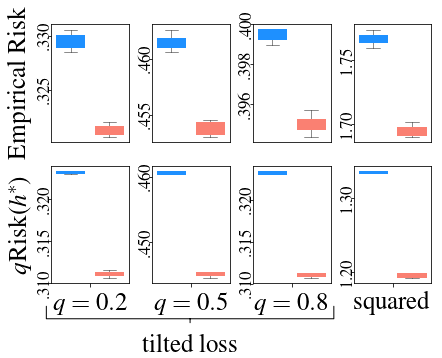

In [8]:
print("TEST DATA")
start_plotting(cmbright=False, font_size=17*1.5)
for ix, (loss, label) in enumerate([("tilted0.2", r"$q=0.2$"), ("tilted0.5", r"$q=0.5$"), ("tilted0.8", r"$q=0.8$"), ("squared", "Sqrd")]):
    plt.subplot(2,4,ix+1)
    plt.subplots_adjust(wspace=0.3)
    
    d0 = df[(df.loss==loss) & (df.logu=="utility_term_vi")]["test_erisk"]
    d1 = df[(df.loss==loss) & (df.logu=="utility_term_naive")]["test_erisk"]
    
    bp = plt.boxplot([d0], positions=[-0.25], showfliers=False, widths=[0.35], patch_artist=True)
    fix_colors(bp, "dodgerblue")
    
    bp = plt.boxplot([d1], positions=[+0.25], showfliers=False, widths=[0.35], patch_artist=True)
    fix_colors(bp, ("greenyellow" if loss=="sq" else  "salmon"))
    
    if ix==0: plt.ylabel("Empirical Risk")
    plt.xticks([],[])  
    plt.yticks(rotation=90, ha="center", va="center")
    plt.tick_params(axis='y', which='major', labelsize=17)
    plt.gca().yaxis.set_major_formatter(major_formatter2 if loss=="squared" else major_formatter3)    
    plt.xlim(-0.5, 0.5)
    


for ix, (loss, label) in enumerate([("tilted0.2", r"$q=0.2$"), ("tilted0.5", r"$q=0.5$"), ("tilted0.8", r"$q=0.8$"), ("squared", "squared")]):
    plt.subplot(2,4,ix+5)
    plt.subplots_adjust(wspace=0.3)
    
    d0 = df[(df.loss==loss) & (df.logu=="utility_term_vi")]["test_qrisk"]
    d1 = df[(df.loss==loss) & (df.logu=="utility_term_naive")]["test_qrisk"]
    
    bp = plt.boxplot([d0], positions=[-0.25], showfliers=False, widths=[0.35], patch_artist=True)
    fix_colors(bp, "dodgerblue")
    
    bp = plt.boxplot([d1], positions=[+0.25], showfliers=False, widths=[0.35], patch_artist=True)
    
    fix_colors(bp, ("greenyellow" if loss=="sq" else  "salmon"))
    
    if ix==0: plt.ylabel("$q$Risk($h^*$)")
    plt.xticks([0],[label], fontsize=25)  
    plt.yticks(rotation=90, ha="center", va="center")
    plt.tick_params(axis='y', which='major', labelsize=17)
    plt.gca().yaxis.set_major_formatter(major_formatter2 if loss=="squared" else major_formatter3)
    plt.xlim(-0.5, 0.5)
    
    
    
plt.gca().annotate('tilted loss', xy=(0.43, 0.115), xytext=(0.43, 0.005), xycoords='figure fraction', 
            fontsize=25, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', lw=0),
            arrowprops=dict(arrowstyle='-[, widthB=5.75, lengthB=0.5', lw=1.0))    

plt.savefig("mf_risks_different_losses.pdf")
plt.show()

TRAINING DATA


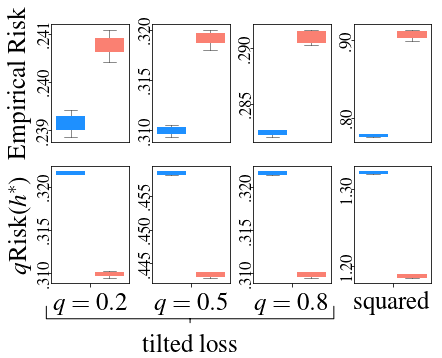

In [9]:
print("TRAINING DATA")
start_plotting(cmbright=False, font_size=17*1.5)
for ix, (loss, label) in enumerate([("tilted0.2", r"$q=0.2$"), ("tilted0.5", r"$q=0.5$"), ("tilted0.8", r"$q=0.8$"), ("squared", "Sqrd")]):
    plt.subplot(2,4,ix+1)
    plt.subplots_adjust(wspace=0.3)
    
    d0 = df[(df.loss==loss) & (df.logu=="utility_term_vi")]["training_erisk"]
    d1 = df[(df.loss==loss) & (df.logu=="utility_term_naive")]["training_erisk"]
    
    bp = plt.boxplot([d0], positions=[-0.25], showfliers=False, widths=[0.35], patch_artist=True)
    fix_colors(bp, "dodgerblue")
    
    bp = plt.boxplot([d1], positions=[+0.25], showfliers=False, widths=[0.35], patch_artist=True)
    fix_colors(bp, ("greenyellow" if loss=="sq" else  "salmon"))
    
    if ix==0: plt.ylabel("Empirical Risk")
    plt.xticks([],[])  
    plt.yticks(rotation=90, ha="center", va="center")
    plt.tick_params(axis='y', which='major', labelsize=17)
    plt.gca().yaxis.set_major_formatter(major_formatter2 if loss=="squared" else major_formatter3)    
    plt.xlim(-0.5, 0.5)
    


for ix, (loss, label) in enumerate([("tilted0.2", r"$q=0.2$"), ("tilted0.5", r"$q=0.5$"), ("tilted0.8", r"$q=0.8$"), ("squared", "squared")]):
    plt.subplot(2,4,ix+5)
    plt.subplots_adjust(wspace=0.3)
    
    d0 = df[(df.loss==loss) & (df.logu=="utility_term_vi")]["training_qrisk"]
    d1 = df[(df.loss==loss) & (df.logu=="utility_term_naive")]["training_qrisk"]
    
    bp = plt.boxplot([d0], positions=[-0.25], showfliers=False, widths=[0.35], patch_artist=True)
    fix_colors(bp, "dodgerblue")
    
    bp = plt.boxplot([d1], positions=[+0.25], showfliers=False, widths=[0.35], patch_artist=True)
    
    fix_colors(bp, ("greenyellow" if loss=="sq" else  "salmon"))
    
    if ix==0: plt.ylabel("$q$Risk($h^*$)")
    plt.xticks([0],[label], fontsize=25)  
    plt.yticks(rotation=90, ha="center", va="center")
    plt.tick_params(axis='y', which='major', labelsize=17)
    plt.gca().yaxis.set_major_formatter(major_formatter2 if loss=="squared" else major_formatter3)
    plt.xlim(-0.5, 0.5)
    
    
    
plt.gca().annotate('tilted loss', xy=(0.43, 0.115), xytext=(0.43, 0.005), xycoords='figure fraction', 
            fontsize=25, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', lw=0),
            arrowprops=dict(arrowstyle='-[, widthB=5.75, lengthB=0.5', lw=1.0))    

plt.savefig("mf_risks_different_losses_train.pdf")
plt.show()

## Risk Improvement

In [10]:
d0 = df[df.logu=="utility_term_vi"].sort_values(by=["loss", "SEED"])
d1 = df[df.logu=="utility_term_naive"].sort_values(by=["loss", "SEED"])
d1["test_erisk_improvement"] = (np.array(d0["test_erisk"])-np.array(d1["test_erisk"]))/np.array(d0["test_erisk"])*100

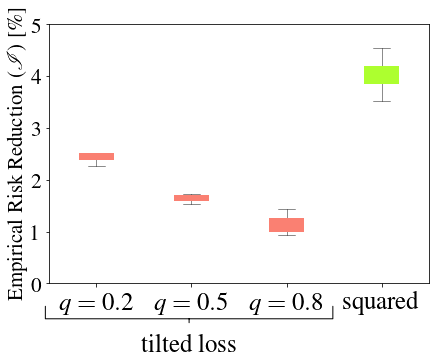

In [11]:
start_plotting(cmbright=False, font_size=17*1.5)
loss2label = [("tilted0.2", r"$q=0.2$"), ("tilted0.5", r"$q=0.5$"), ("tilted0.8", r"$q=0.8$"), ("squared", "squared")]
N = len(loss2label)
for ix, (loss, label) in enumerate(loss2label):
    dd = d1[(df.loss==loss)]["test_erisk_improvement"]
    bp = plt.boxplot([dd], positions=[ix], showfliers=False, widths=[0.35], patch_artist=True)
    fix_colors(bp, ("greenyellow" if loss=="squared" else  "salmon"))    
    
plt.gca().annotate('tilted loss', xy=(0.43, 0.115), xytext=(0.43, 0.005), xycoords='figure fraction', 
            fontsize=25, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', lw=0),
            arrowprops=dict(arrowstyle='-[, widthB=5.75, lengthB=0.5', lw=1.0))        
    
plt.xticks(list(range(N)), list(zip(*loss2label))[1], fontsize=25)      
plt.xlim(-0.5, N-0.5)    
plt.ylim(0, 5)
plt.ylabel("Empirical Risk Reduction ($\mathcal{I}$) [\%]", fontsize=21)
plt.savefig("mf_improvements_different_losses.pdf")
plt.show()